# **ABSTRACTO**


El dataset elegido corresponde a los datos libres recolectados del uso de la cadena de alquiler de Airbnb. 

Allí podemos analizar información como ubicación, precio y tiempo de estadía en los diferentes estilos de vivienda disponibles: casa, habitación o cuarto. 

En nuestro estudio, nos propondremos analizar las diferentes rentabilidades de las propiedades desde el punto de vista del inversor que busca generar del alquiler un negocio. La pregunta planteada sera **en que zona es mas rentable invertir**; para esto veremos cual barrio tiene la mayor *tasa de ocupacion* y *precio de alquiler*, cruzando esta informacion con el *precio del terreno* y *servicios de la inversion*. Tambien analizaremos si la mayor ocupacion se realiza en habitaciones con baño y cocina, para lo cual habrà que invertir en servicios, o si las habitaciones deben ser grandes para albergar la mayor cantidad posible de camas, y como esto se traduce al costo de alquiler; si hay una relacion entre mayor inversion (mayor comodidad para el usuario) y mayor costo de alquiler. 

Adicionalmente tratar de encontrar una posible relacion entre el precio del alquier diario y el tiempo que la vivienda esta sin alquialrse, para asi encontrar que factores estan haciendo no rentable o con baja renyabilidad un inmuble. En un analisis mas profundo, veremos impactan los comentarios negativos y/o positivos en la ocupacion del inmueble, o si la politica de cancelacion libre genera un retraso importante en la amortizaciòn de la inversion.

# **HIPOTESIS**


Con la data obtenida se espera encontrar que zona y que precio sería el adecuado para lograr una rentabilidad máxima, de esta forma lograr que la inversión ( la compra del inmueble ), tengo el menor ROI posible. Para esto es necesario evaluar, el precio promedio, tanto por zona, tipo de vivienda, cantidad de cuartos y "fees" adicionales de servicio. Todo es tomando como comparativa inicial el coste por noche de las habitaciones de los hoteles. Determinar que precio es el adecuado para competir directamente con los hoteles que se encuentran en la misma zona o zonas cercanas.

La relación existente en el precio por noche y el precio de servicio, con la ocupación  de la viviendo en el transcurso de un año, es vital para evitar que la inversión genere perdidas a corto o largo plazo y una forma de estudiar este posible escenario sería compararla con los precios promedios y ubicaciones de los cuartos de hotel y la ocupación en la misma zona. Con este análisis podríamos obtener un posible, o una predicción cercana a los ingresos que podría generar el alquilar la misma en Airbnb.

Un factor importante a tomar en cuenta sería la cantidad de habitaciones, como afecta al precio y a la rentabilidad de la misma, se alquilarían más o menos un Airbnb con más habitaciones? afectaría la zona donde se encuentre el mismo ?




#### IMPORTAMOS LAS LIBERIAS NECESARIAS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### CARGA DEL DATASET
##### Utilizamos head para obtener los primeros 5 registros del dataset y verificar que haya cargado de forma correcta.

In [2]:
df = pd.read_csv("Airbnb_Open_Data.csv")
df.head(5)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


#### INFORMACION DE LOS TIPOS DE DATOS 

In [3]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

Se puede observar que se requiere transformaciones de los tipos de datos de varias columnas con el fin de poder realizar un analisis eficiente de la data.
Valores como el "price", "service fee", deben ser convetirdos a numeros, por ejemplo. Ademas es necesario realizar un limpieza de datos de las colunmas que no 
aportan informacion util durante el proceso de analisis, como el nombre del host o el ID del mismo.

#### DETALLES DE LOS VALORES NAN O NULLOS DEL DATASET.

In [4]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

Se puede observar que hay un cantidad faltante de datos importantes en las colunmas "last review", "review rate", "reviews per month", "house_rules" y "license"
por lo que lo conveniente en este caso seria no utilizar dichas colunmas para analisis a futuro debido a que se podria obtener un analisis muy poco confiable del mismo.

#### ELIMINANDO LAS COLUNMAS QUE NO SE UTILIZARAN, USANDO EL METODO DROP.

In [5]:
df.drop('license', inplace=True, axis=1)
df.drop('house_rules', inplace=True, axis=1)
df.drop('last review', inplace=True, axis=1)
df.drop('NAME', inplace=True, axis=1)
df.drop('host_identity_verified', inplace=True, axis=1)
df.drop('reviews per month', inplace=True, axis=1)
df.drop('host name', inplace=True, axis=1)

df.dtypes

id                                  int64
host id                             int64
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

##### Imprimimos nuevamente el data set para verificar que se haya realizado de forma correcta el drop
##### Verificamos nuamente la cantidades de valores NaN y Null


In [6]:
df.isnull().sum()

id                                  0
host id                             0
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
country                           532
country code                      131
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

#### CAMBIAMOS EL TIPO DE DATOS DE LAS VALERIABLES DE INTERES A UNO QUE NOS PERMITA TRABAJARLAS.

1. Los precios incluyen el simbolo del $, por lo cual se considera como un objeto. Para esto realizaremos las transofrmaciones necesarias para volverlo de 
tipo float64.

In [7]:
df['price'].dtype

dtype('O')

convirtiendo a valores a tipo float

In [8]:
df['price']=(df['price'].replace( '[\$,)]','', regex=True ) .replace( '[(]','-',   regex=True ).astype(float))

In [9]:
df['service fee']=(df['service fee'].replace( '[\$,)]','', regex=True ) .replace( '[(]','-',   regex=True ).astype(float))

Verificamos que la transformacion fue correcta.

In [10]:
df.dtypes

id                                  int64
host id                             int64
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

In [11]:
df['service fee']

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service fee, Length: 102599, dtype: float64

In [12]:
df['price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

#### TRABAJANDO CON LOS VALORES EN BLANCO O NULOS.

Para trabajar con los valores en nulos, tenemos que ver que estrategia seria la adecuada para cada colunma.
En el caso de precios, lo ideal seria utilizar el promedio.

In [13]:
price_nan = df["price"].isna().sum()
service_fee_nan= df["service fee"].isna().sum()
print("Tenemos una cantidad de precios en blanco de : "+ str(price_nan) + " y de fee service en blancos de :" + str(service_fee_nan) )

Tenemos una cantidad de precios en blanco de : 247 y de fee service en blancos de :273


#### CREAMOS UN IMPUTADOR, PARA LLENAR LOS VALORES EN BLANCO CON EL PROMEDIO

Las variables las colunmas que procesaremos mediante este imputer seran:

1. price
2. service fee
3. aviability 365
4. Construction year

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['price','service fee','availability 365','Construction year']])
df[['price','service fee','availability 365','Construction year']]=imputer.transform(df[['price','service fee','availability 365','Construction year']])


Verificamos que ya no existan datos nulos en las colunmas transofrmadas.

In [15]:
df.isnull().sum()

id                                  0
host id                             0
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
country                           532
country code                      131
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                   0
price                               0
service fee                         0
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                    0
dtype: int64

Procedemos ahora a trabajar con la data en Nulo o Nan de "country code" y de "country". En este caso hacer drop de esos valores puede afectar nuestro resultado,
al saber que nuestra informacion es solo de Estados Unidos y en especifico de New York, se puede reemplazar facilmente los valores en blanco con la data mas frecuente.
Para esto utilizaremos nuevamente un imputer.

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['country','country code','instant_bookable']])
df[['country','country code','instant_bookable']]=imputer.transform(df[['country','country code','instant_bookable']])

Verificamos nuevamente que no existan Nulos en las colunmas que acabamos de cambiar.

In [17]:
df.isna().sum()


id                                  0
host id                             0
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
country                             0
country code                        0
instant_bookable                    0
cancellation_policy                76
room type                           0
Construction year                   0
price                               0
service fee                         0
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                    0
dtype: int64

Revisamos como podemos tratar el minimo de noches requeridas para el airbnb. Realizamos un describe de "minimum nights"

In [18]:
df['minimum nights'].describe()

count    102190.000000
mean          8.135845
std          30.553781
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64

Observamos que hay valores fuera del rango logico permitido. En el min podemos observar que un -1223 de noches disponibles.
En este caso, reemplazaramos los numeros negativos y los cambiaremos por el cuartil 25%. Primero llenamos los valores faltantes.

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=2)
imputer.fit(df[['minimum nights']])
df[['minimum nights']]=imputer.transform(df[['minimum nights']])

Ahora trabajamos con las noches minimo negativas. Para eso utilizamos numpy y filtramos que las noches que estan en negativa, sean al menos 1 noche.

In [20]:
df['minimum nights'] = np.where(df['minimum nights'] < 0, 1, df['minimum nights'])
(df['minimum nights']<0).value_counts()
df['minimum nights'].describe()

count    102599.000000
mean          8.130771
std          30.219562
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64

#### ARREGLANDO VALORES EN 'neighbourhood group'. POSIBLE ERROR DE TIPEO

In [21]:
df['neighbourhood group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

Podemos observar que manhatan y Manhattan son el mismo, pero con una diferencia de miniscula y mayuscula. Lo mismo sucede con brooklyn y Brooklyn.
Para esto vamos a acomodarlo utilizando la funcion replace. 


In [22]:
df['neighbourhood group'] = df['neighbourhood group'].replace(['brookln'],'Brooklyn')
df['neighbourhood group'] = df['neighbourhood group'].replace(['manhatan'],'Manhattan')
df["neighbourhood group"].value_counts().sum
df.dropna(subset=['neighbourhood group','neighbourhood'], inplace=True)

Utilizando el Ordinal encoder transforme la comlunma neighbourhood group, a valores numericos.
<table >
    <tr><th >neighbourhood_code <th><th> neighbourhood group <th><th> Count <tr><tr>
    <tr><td> 2.0 <td><td> Manhattan <td><td> 43793 <td><tr>
    <tr><td> 1.0 <td><td> Brooklyn <td><td> 41843 <td><tr>
    <tr><td> 3.0 <td><td> Queens <td><td> 13267 <td><tr>    
    <tr><td> 0.0 <td><td> Bronx <td><td> 2712 <td><tr>
    <tr><td> 4.0 <td><td> Staten Island <td><td> 955 <td><tr>
<table>

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["neighbourhood_code"] = ord_enc.fit_transform(df[["neighbourhood group"]])
df[['neighbourhood group','neighbourhood_code','neighbourhood']].head(11)


,neighbourhood group,neighbourhood_code,neighbourhood
0,Brooklyn,1.0,Kensington
1,Manhattan,2.0,Midtown
2,Manhattan,2.0,Harlem
3,Brooklyn,1.0,Clinton Hill
4,Manhattan,2.0,East Harlem
5,Manhattan,2.0,Murray Hill
6,Brooklyn,1.0,Bedford-Stuyvesant
7,Brooklyn,1.0,Bedford-Stuyvesant
8,Manhattan,2.0,Hell's Kitchen
9,Manhattan,2.0,Upper West Side


In [24]:
df[['neighbourhood_code','neighbourhood group']].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of neighbourhood_code  neighbourhood group
2.0                 Manhattan              43785
1.0                 Brooklyn               41835
3.0                 Queens                 13267
0.0                 Bronx                   2712
4.0                 Staten Island            955
dtype: int64>

#### GRAFICOS  

##### UTILIZANDO UN COUNPLOT PARA SABER LA CANTIDAD Y TIPO DE ALQUILERES

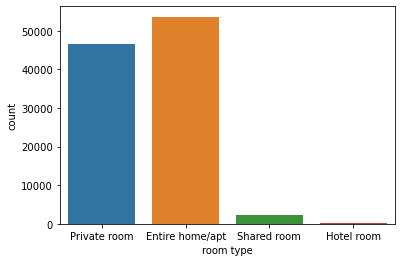

In [25]:
sns.countplot(data=df,x="room type")
plt.show()

Observamos claramente que la mayor cantidad disponibles de airbnb son csas completas o apartamentos completos.
Y las habitaciones de hotel y los cuartos compartidos son mucho menos.

### GRAFICO DE HOSPEDAJES POR VECINDARIOS

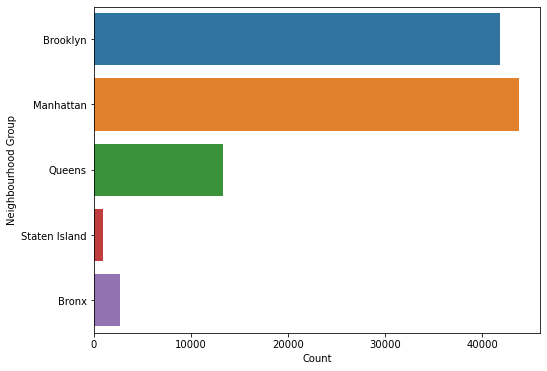

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,y="neighbourhood group")
plt.xlabel("Count")
plt.ylabel("Neighbourhood Group")
plt.show()

Este grafico muestra el total por vecindad y la cantidad de hospedajes disponibles en total, En este grafico podemos observar que Manhattan es el que mayor disponibilidad de habitacion tiene.
Esto tiene sentido, debido a que es Brooklyn y Manhattan las localidades mas frecuentadas por lo turistas. Se podria estudiar la relacion entre el costo por noche localidad, para estudiar que tanta es la deferencia de precio y que tan ocuapda esta lo largo del anio.

### GRAFICO PRECIO VS TIPO DE CUARTO

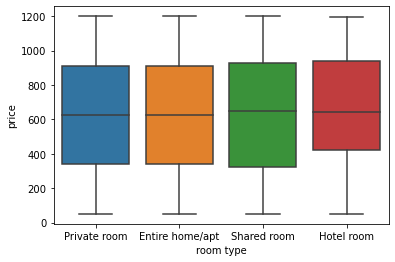

In [27]:
sns.boxplot(data=df, x='room type', y='price');


Podemos ver el precio pomedio por cada tipo de habitacion, los cuartos compartidos se consiguen
mas economicos que q los provados y las casas enteras, mientras que los hoteles, empiezan desde un rango mas caro
y tiene un precio tope mas alto. Sin embargo el dataset no cuenta con la informacion necesaria para establecer una clara diferncia entre los precios
de los hoteles y de cuartos compartidos, con los precios del alquiler de un airbnb,


### GRAFICO SCATTER PLOT DE LAS LONGITUDES Y LATITUDES

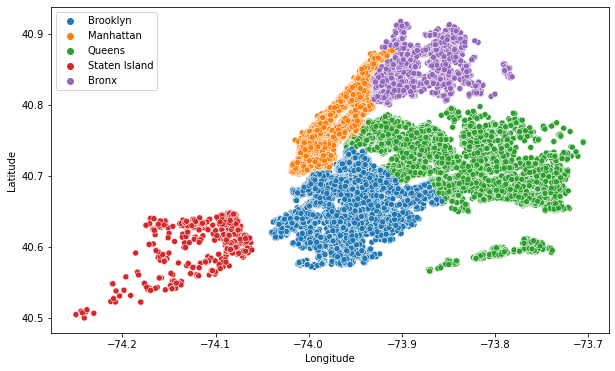

In [28]:
plt.figure(figsize = (10,6));
sns.scatterplot(data=df, x="long", y="lat", hue="neighbourhood group");
plt.ylabel("Latitude");
plt.xlabel("Longitude");
plt.legend();

De este grafico podemos observar que Queens es la locacion que mas habitaciones tiene disponibles, ocupando un espacio mayor que las 2 primeras
localidades con mayor cantidad. Esto quiere decir que tenemos una mayor condensacion de en los dos primeros vecindarios.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


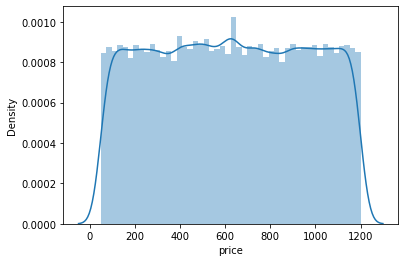

In [29]:
sns.distplot(df['price']);

Se puede observar la mayor concentracion de tipos de cuartos airbn se encuentran 
entre las latitudes 40.6-40.9 y la longitud -74 -73

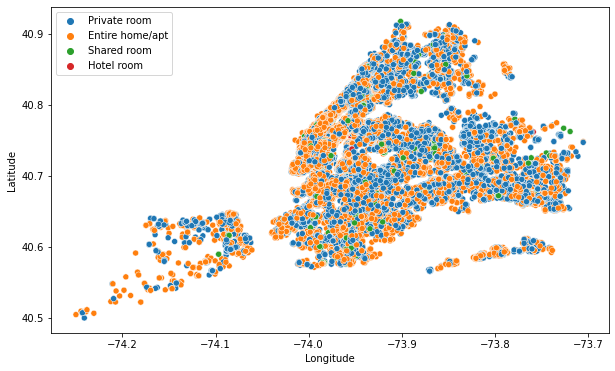

In [30]:
plt.figure(figsize = (10,6));
sns.scatterplot(data = df, x="long", y="lat", hue="room type");
plt.ylabel("Latitude" );
plt.xlabel("Longitude");
plt.legend();

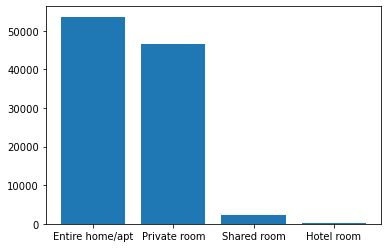

In [31]:
counts =df['room type'].value_counts()
x = plt.bar(counts.index,counts.values)
plt.show()

# **RECOMENDACIONES**


En base al análisis previo superficial,  podemos observar que hay carencia evidente de cuartos compartidos en las zonas de mayor densidad de Airbnb disponibles. Esto podría permitir un nuevo mercado de listing en Airbnb de cuartos compartidos, que permitirían al viajero ahorrar dinero, mientras que el propietario del listing podrá tener siempre una mayor disponibilidad durante el año.

Esto traería como ventaja que el precio de alquiler disminuya, esto a su vez atraería nuevos clientes, el tener múltiples cuartos compartidos, aumentaría la disponibilidad del listing durante el año, pero a su vez, que implicaría que el dueño del listing pueda recibir más personas que se traduce en  un mayor ingreso y un ROI mas rápido. Se podría establecer como precio máximo el mínimo coste de una  habitación privada en una de las zonas de mayor costo.

A continuación se utilizará el método de regresión lineal, para observar si es capaz de predecir, de manera acertada, la relación entre precio y la ocupación.

In [32]:
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
# definimos matriz de diseño X y vector respuesta y

X = pd.DataFrame(df['price'])
y = abs(pd.Series(df['availability 365']))

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 119.8676628847847


In [36]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 18226.073384000705


In [37]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 135.00397543776518


In [38]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 4.905304225692004


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-1.8426213069799857e-05


Nos encontramos con una MAE (en un rango de 0 a 365) de 120, cercana al 33%. Lo cual no es buena señal para el modelo. La MSE obtenida tambien acompaña esta tendencia, ya que es muy elevada. Lo mismo nos indica el RMSE, con un resultado cercano al 37%. Finalmente el valor de r2 nos confirma que no se trata de un ajuste lineal y la acertividad del modelo no es buena.

Esto puede deberse a que el modelo no es el adecuado, habria que investigar otro modelo dentro de la regresion, ya que al tener valores continuos, no podemos utilizar las clases y la clasificacion por medio de arbol de decision.  Por otro lado, tambien habria que analizar si existe una relacion real entre las variables de precio y de ocupabilidad de las habitaciones, ya que seguramente entren en juego otros factores en la ecuacion, como la ubicacion y los metros cuadrados.

A continuación se utilizará el método de árbol de decisión, para observar si es capaz de predecir, de manera acertada, la relación entre precio y reservas instantaneas de las habitaciones.
Luego se utilizará el método de regresión lineal para realizar una predicción entre el precio de la habitación y el servicio cobrado (fee).

In [40]:
ord_enc = OrdinalEncoder()
df['instant_bookable_code'] = ord_enc.fit_transform(df[['instant_bookable']])
df['instant_bookable_code']

0         0.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
102594    0.0
102595    1.0
102596    1.0
102597    1.0
102598    0.0
Name: instant_bookable_code, Length: 102554, dtype: float64

In [41]:
# definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(df['price'])
y = abs(pd.Series(df['instant_bookable_code']))

In [42]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [43]:
# Creamos un modelo Arbol de Decision con parametros por defect
modelo = DecisionTreeClassifier()

In [44]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<Figure size 720x432 with 0 Axes>

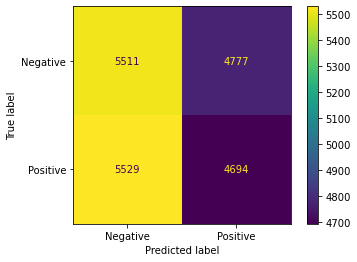

In [46]:
#Ploteamos en una matrix de confusion
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive']);

In [47]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.50      0.54      0.52     10288
         1.0       0.50      0.46      0.48     10223

    accuracy                           0.50     20511
   macro avg       0.50      0.50      0.50     20511
weighted avg       0.50      0.50      0.50     20511



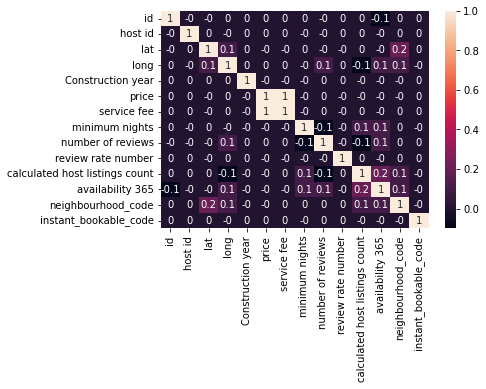

In [48]:
#Se hace una matrix de correlacion para ver que variable usar.
matrix= df.corr().round(1)
sns.heatmap(data=matrix, annot=True);

Se puede observar que el recall de la predicción es muy bajo, tanto para positivos (se puede bookear instantaneamente) como para negativos (no se puede). Esto nos deja ante una situacion de prediccion erronea, que lleva a la empresa a disponer de sus recursos de manera equivocada y a un futuro inversor y usuario del servicio, a la mala utilizacion de la plataforma. En la matriz podemos ver que todos los cuadrantes tienen valores similares, lo cual se verifica con un 50% de precision. 

En base a la matriz de correlacion de los valores, se encuentra que existe una relacion entre el precio de la habitacion y el fee cobrado, por lo cual se realiza una regresion lineal a continuacion.

In [49]:
# definimos matriz de diseño X y vector respuesta y utilizando las variables con mejores correlacion
X = pd.DataFrame(df['price'])
y = abs(pd.Series(df['service fee']))

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.5657083306267007


In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9949180786391573


La MAE se encuentra en las unidades de la variable de salida, el fee cobrado, que puede ser tan elevado como el gasto del cliente; por lo cual encontrarnos con una MAE tan pequeña nos indica que el error absoluto es muy bajo y se pudo predecir de manera acertada. Cuando vemos el r2 de la funcion, nos encontramos con un valor muy cercano a 1, lo que nos indica que la linealidad es correcta.

En este caso las variables elegidas para realizar el analisis son correctas y el modelo pudo realizar la prediccion. Pero a la vez, sabemos que se trata de un impuesto posiblemente porcentual sobre el valor pagado por el inquilino, por lo cual estas dos variables estan mas que relacionadas, y se podria decir que se trata de lo mismo. Por lo cual, si bien el modelo funciona correctamente, no le aportaria mayor informacion a futuro al inversionista.

# Conclusiones

Agregando una variable de precios de los metros cuadrados estariamos en condiciones de responder a la pregunta inicial.